<a href="https://colab.research.google.com/github/arindamchoudhary047/Prediction-Of-Final-Hardness/blob/main/Tempering_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Analysis Of Dataset

In [68]:
import numpy as np

import pandas as pd
df = pd.read_csv("/content/Tempering data for carbon and low alloy steels - Raiipa.csv")
df.head()

,Source,Steel type,Initial hardness (HRC) - post quenching,Tempering time (s),Tempering temperature (ºC),C (%wt),Mn (%wt),P (%wt),S (%wt),Si (%wt),Ni (%wt),Cr (%wt),Mo (%wt),V (%wt),Al (%wt),Cu (%wt),Final hardness (HRC) - post tempering
0,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,204.4,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,50.6
1,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,260.0,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,48.3
2,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,315.6,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,43.7
3,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,371.1,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,40.5
4,"Grange and Baughman, 1956",AISI-SAE 1026,?,600,426.7,0.25,0.79,0.012,0.026,0.11,0.0,0.0,0.0,0.0,0.0,0.0,37.3


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Source                                   1466 non-null   object 
 1   Steel type                               1466 non-null   object 
 2   Initial hardness (HRC) - post quenching  1466 non-null   object 
 3   Tempering time (s)                       1466 non-null   int64  
 4   Tempering temperature (ºC)               1466 non-null   float64
 5   C (%wt)                                  1466 non-null   float64
 6   Mn (%wt)                                 1466 non-null   float64
 7   P (%wt)                                  1466 non-null   float64
 8   S (%wt)                                  1466 non-null   float64
 9   Si (%wt)                                 1466 non-null   float64
 10  Ni (%wt)                                 1466 no

In [70]:
df.describe()

,Tempering time (s),Tempering temperature (ºC),C (%wt),Mn (%wt),P (%wt),S (%wt),Si (%wt),Ni (%wt),Cr (%wt),Mo (%wt),V (%wt),Al (%wt),Cu (%wt),Final hardness (HRC) - post tempering
count,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,21969.754434,422.024147,0.511583,0.740730,0.017236,0.023802,0.239379,0.362838,0.389696,0.080232,0.005457,0.034379,0.005986,41.468008
std,34177.623863,176.088041,0.224354,0.252913,0.007966,0.007967,0.239193,0.810091,0.480721,0.121422,0.029050,0.205340,0.019085,14.079248
min,10.000000,100.000000,0.250000,0.300000,0.007000,0.005000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,600.000000,260.000000,0.370000,0.600000,0.012000,0.018000,0.160000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,32.100000
50%,3600.000000,426.700000,0.420000,0.740000,0.017000,0.024000,0.210000,0.010000,0.060000,0.000000,0.000000,0.000000,0.000000,43.100000
75%,14400.000000,593.300000,0.560000,0.800000,0.019000,0.029000,0.240000,0.060000,0.800000,0.220000,0.000000,0.000000,0.000000,51.800000
max,115200.000000,704.400000,1.150000,1.850000,0.054000,0.055000,1.620000,3.410000,1.570000,0.360000,0.160000,1.260000,0.080000,68.500000


We encode steel grades into metallurgy-based groups so the ML model learns material families instead of sparse numeric labels, improving physical meaning and reducing overfitting.

In [71]:
# Function to map AISI-SAE steel grades to metallurgy groups (excluding the ones named as _% plain carbon steels)
def classify_steel(grade):
    if pd.isna(grade):
        return "Unknown"

    # Extract numeric part (last 4 digits)
    grade_num = ''.join(filter(str.isdigit, str(grade)))

    if len(grade_num) < 4:  # safety check
        return "Other Alloy Steel"

    # Take first two digits to classify
    prefix = grade_num[:2]

    if prefix == "10":
        return "Plain Carbon Steel"
    if prefix == "11":
        return "Resulfurized Carbon Steel"
    if prefix == "13":
        return "Manganese Steel"
    if prefix == "23":
        return "Nickel-Chromium Steel"
    if prefix == "31":
        return "Chromium-Nickel Steel"
    if prefix == "40":
        return "Molybdenum Steel"
    if prefix == "41":
        return "Chromium-Molybdenum Steel"
    if prefix == "46":
        return "Chromium-Molybdenum Steel"
    if prefix == "43":
        return "Nickel-Chromium-Molybdenum Steel"
    if prefix in ["86", "87"]:
        return "Nickel-Chromium-Molybdenum Steel"
    if prefix in ["93","92"]:
        return "Nickel-Chromium-Molybdenum Steel (High-Nickel)"
    if prefix in ["50",'51']:
        return "Chromium Steel"
    if prefix == "61":
        return "Chromium-Vanadium Steel"

    # Default for unknown numeric codes
    return "Other Alloy Steel"

    # Default
    return "Other Alloy Steel"

# Apply classification
df["SteelGroup"] = df["Steel type"].apply(classify_steel)

In [72]:
# Replace any "%C – plain carbon steel" entries with "Plain Carbon Steel"

df["SteelGroup"] = df.apply(
    lambda row: "Plain Carbon Steel"
    if pd.notna(row["Steel type"]) and "%C" in str(row["Steel type"])
    else row["SteelGroup"],
    axis=1
)

# Preview results
df[["Steel type", "SteelGroup"]].head()


,Steel type,SteelGroup
0,AISI-SAE 1026,Plain Carbon Steel
1,AISI-SAE 1026,Plain Carbon Steel
2,AISI-SAE 1026,Plain Carbon Steel
3,AISI-SAE 1026,Plain Carbon Steel
4,AISI-SAE 1026,Plain Carbon Steel


In [73]:
counts = df['SteelGroup'].value_counts()
print(counts)

SteelGroup
Plain Carbon Steel                                579
Molybdenum Steel                                  160
Chromium-Molybdenum Steel                         143
Chromium-Vanadium Steel                           101
Chromium Steel                                    101
Nickel-Chromium-Molybdenum Steel                  101
Other Alloy Steel                                  91
Nickel-Chromium Steel                              50
Manganese Steel                                    50
Chromium-Nickel Steel                              50
Nickel-Chromium-Molybdenum Steel (High-Nickel)     40
Name: count, dtype: int64


To prevent overfitting, will not be conducting the model training on groups with less than 100 rows. (19.2% dataset not being used)

In [74]:
counts = df["SteelGroup"].value_counts()
groups_to_keep = counts[counts > 100].index.tolist()

df_new = df[df["SteelGroup"].isin(groups_to_keep)].copy()

print(df_new["SteelGroup"].value_counts())

SteelGroup
Plain Carbon Steel                  579
Molybdenum Steel                    160
Chromium-Molybdenum Steel           143
Nickel-Chromium-Molybdenum Steel    101
Chromium Steel                      101
Chromium-Vanadium Steel             101
Name: count, dtype: int64


Correlation Matrix

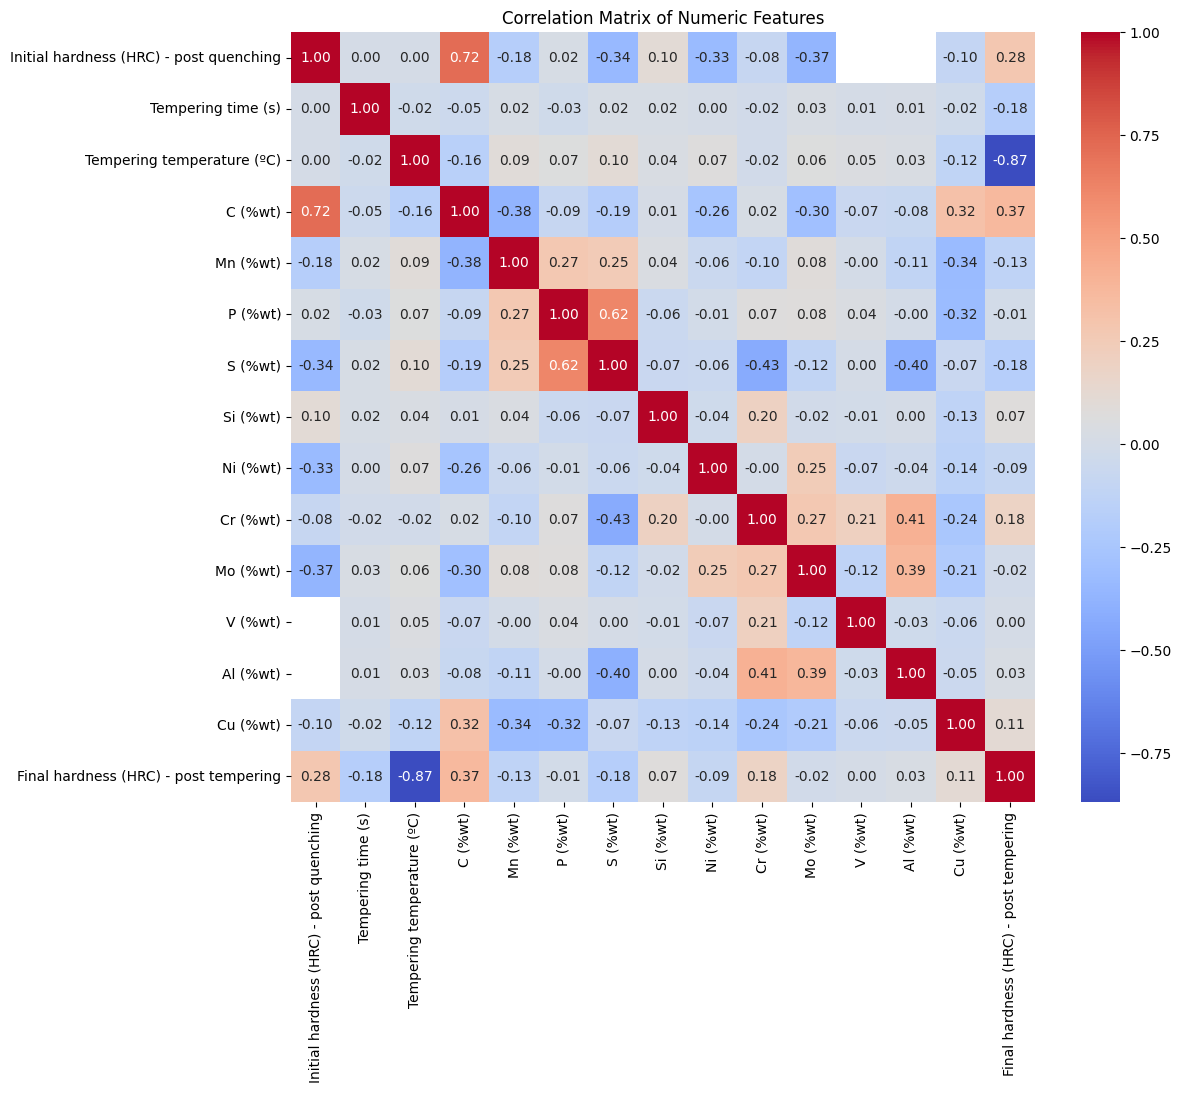

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Initial Hardness to numeric (as it's object type)
df["Initial hardness (HRC) - post quenching"] = pd.to_numeric(
    df["Initial hardness (HRC) - post quenching"], errors='coerce'
)

# Select numeric columns for correlation
numeric_cols = [
    "Initial hardness (HRC) - post quenching",
    "Tempering time (s)",
    "Tempering temperature (ºC)",
    "C (%wt)", "Mn (%wt)", "P (%wt)", "S (%wt)", "Si (%wt)",
    "Ni (%wt)", "Cr (%wt)", "Mo (%wt)", "V (%wt)", "Al (%wt)", "Cu (%wt)",
    "Final hardness (HRC) - post tempering"
]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

Box Plot For Tempering Temperature Vs Final Hardness

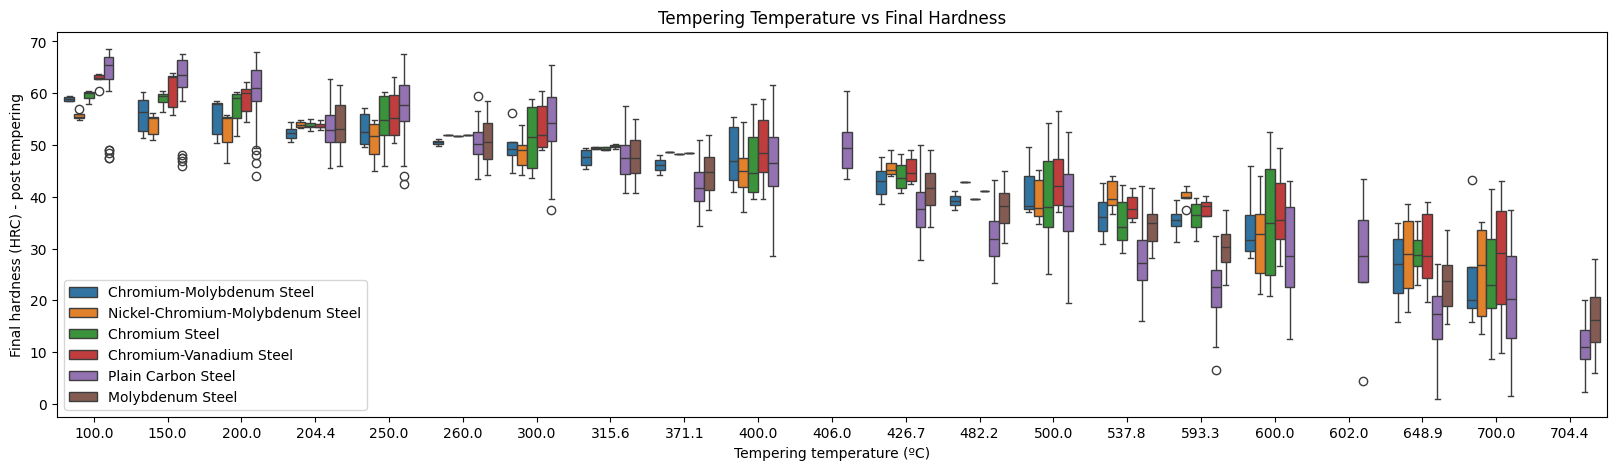

In [76]:
plt.figure(figsize=(20, 5))
sns.boxplot(x="Tempering temperature (ºC)", y="Final hardness (HRC) - post tempering", hue="SteelGroup", data=df_new)
plt.title("Tempering Temperature vs Final Hardness")
plt.legend(loc = "lower left")
plt.show()

Distribution Plot

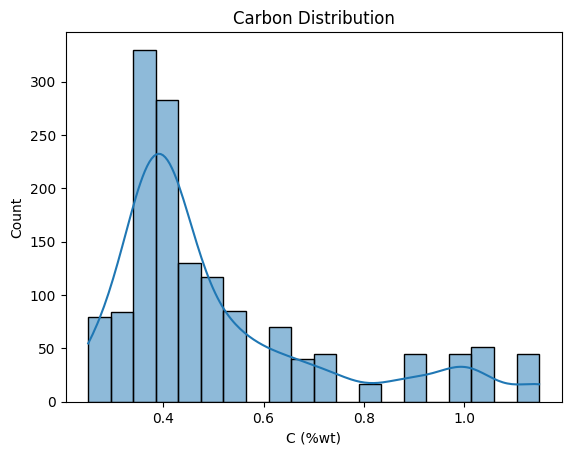

In [77]:
sns.histplot(df["C (%wt)"], bins=20, kde=True)
plt.title("Carbon Distribution")
plt.show()

Box Plot For Final Hardness Vs Steel Group

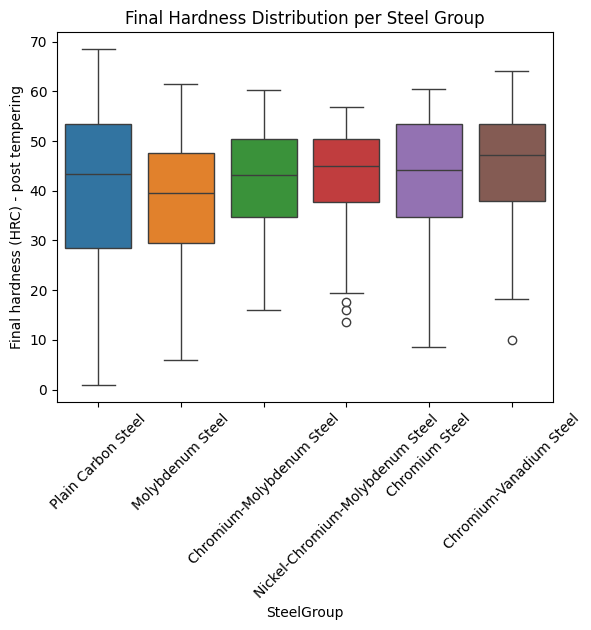

In [78]:
sns.boxplot(x="SteelGroup", y="Final hardness (HRC) - post tempering",hue = "SteelGroup", data=df_new)
plt.title("Final Hardness Distribution per Steel Group")
plt.xticks(rotation=45)
plt.show()

Missing Initial Hardness Value Analysis

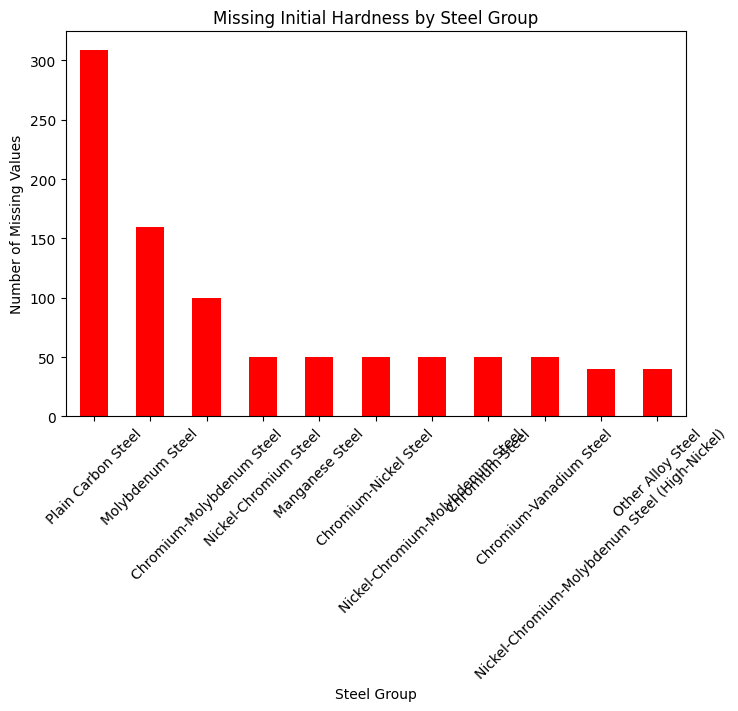

In [79]:

# Count missing Initial Hardness per SteelGroup
missing_per_group = df[df["Initial hardness (HRC) - post quenching"].isna()]["SteelGroup"].value_counts()

# Plot bar chart
missing_per_group.plot(kind="bar", color="red", figsize=(8,5))
plt.ylabel("Number of Missing Values")
plt.xlabel("Steel Group")
plt.title("Missing Initial Hardness by Steel Group")
plt.xticks(rotation=45)
plt.show()

In [80]:
df_final = df_new

df_final["Initial hardness (HRC) - post quenching"] = pd.to_numeric(
    df_final["Initial hardness (HRC) - post quenching"],
    errors="coerce"
)

df_final["Initial hardness (HRC) - post quenching"] = (
    df_final.groupby("SteelGroup")["Initial hardness (HRC) - post quenching"]
      .transform(lambda x: x.fillna(x.median()))
)

global_median = df_final["Initial hardness (HRC) - post quenching"].median()
df_final["Initial hardness (HRC) - post quenching"] = df_final[
    "Initial hardness (HRC) - post quenching"
].fillna(global_median)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, 0 to 1465
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Source                                   1185 non-null   object 
 1   Steel type                               1185 non-null   object 
 2   Initial hardness (HRC) - post quenching  1185 non-null   float64
 3   Tempering time (s)                       1185 non-null   int64  
 4   Tempering temperature (ºC)               1185 non-null   float64
 5   C (%wt)                                  1185 non-null   float64
 6   Mn (%wt)                                 1185 non-null   float64
 7   P (%wt)                                  1185 non-null   float64
 8   S (%wt)                                  1185 non-null   float64
 9   Si (%wt)                                 1185 non-null   float64
 10  Ni (%wt)                                 1185 non-nul

#Feature Engineering On df_final

In [88]:
df_features = df_final.copy()

# -------------------------------
# UNIT CONVERSIONS

# Temperature to Kelvin
df_features["Temp_K"] = df_features["Tempering temperature (ºC)"] + 273.15

# Time to hours (Hollomon-Jaffe standard)
df_features["Time_hr"] = df_features["Tempering time (s)"] / 3600

# Log of time (useful for ML)
df_features["log_Time"] = np.log10(df_features["Time_hr"])


# HOLLOMON–JAFFE PARAMETER
# -------------------------------

C_HJ = 20  # Standard for carbon & low alloy steels

df_features["HJ_parameter"] = (
    df_features["Temp_K"] * (C_HJ + df_features["log_Time"])
)


# CARBON EQUIVALENT (IIW)
# -------------------------------

df_features["CE"] = (
    df_features["C (%wt)"] +
    df_features["Mn (%wt)"] / 6 +
    (df_features["Cr (%wt)"] + df_features["Mo (%wt)"] + df_features["V (%wt)"]) / 5 +
    (df_features["Ni (%wt)"] + df_features["Cu (%wt)"]) / 15
)


# PCM (Better for heat treatment prediction)
# -------------------------------

df_features["PCM"] = (
    df_features["C (%wt)"] +
    df_features["Si (%wt)"] / 30 +
    df_features["Mn (%wt)"] / 20 +
    df_features["Cu (%wt)"] / 20 +
    df_features["Ni (%wt)"] / 60 +
    df_features["Cr (%wt)"] / 20 +
    df_features["Mo (%wt)"] / 15 +
    df_features["V (%wt)"] / 10
)


# 5. HARDENABILITY INDEX
# -------------------------------

df_features["HI"] = (
    df_features["C (%wt)"] +
    (df_features["Mn (%wt)"] + df_features["Cr (%wt)"] +
     df_features["Mo (%wt)"] + df_features["V (%wt)"]) / 5 +
    df_features["Ni (%wt)"] / 10
)


# CARBIDE FORMER STRENGTH INDEX
# -------------------------------

df_features["CFI"] = (
    df_features["Cr (%wt)"] +
    df_features["Mo (%wt)"] +
    df_features["V (%wt)"]
)


# Final dataframe
df_features.head()

,Source,Steel type,Initial hardness (HRC) - post quenching,Tempering time (s),Tempering temperature (ºC),C (%wt),Mn (%wt),P (%wt),S (%wt),Si (%wt),...,Final hardness (HRC) - post tempering,SteelGroup,Temp_K,Time_hr,log_Time,HJ_parameter,CE,PCM,HI,CFI
0,"Grange and Baughman, 1956",AISI-SAE 1026,65.5,600,204.4,0.25,0.79,0.012,0.026,0.11,...,50.6,Plain Carbon Steel,477.55,0.166667,-0.778151,9179.393870,0.381667,0.293167,0.408,0.0
1,"Grange and Baughman, 1956",AISI-SAE 1026,65.5,600,260.0,0.25,0.79,0.012,0.026,0.11,...,48.3,Plain Carbon Steel,533.15,0.166667,-0.778151,10248.128661,0.381667,0.293167,0.408,0.0
2,"Grange and Baughman, 1956",AISI-SAE 1026,65.5,600,315.6,0.25,0.79,0.012,0.026,0.11,...,43.7,Plain Carbon Steel,588.75,0.166667,-0.778151,11316.863451,0.381667,0.293167,0.408,0.0
3,"Grange and Baughman, 1956",AISI-SAE 1026,65.5,600,371.1,0.25,0.79,0.012,0.026,0.11,...,40.5,Plain Carbon Steel,644.25,0.166667,-0.778151,12383.676057,0.381667,0.293167,0.408,0.0
4,"Grange and Baughman, 1956",AISI-SAE 1026,65.5,600,426.7,0.25,0.79,0.012,0.026,0.11,...,37.3,Plain Carbon Steel,699.85,0.166667,-0.778151,13452.410847,0.381667,0.293167,0.408,0.0


In [96]:
# One-hot encode SteelGroup
df_model = pd.get_dummies(df_features, columns=["SteelGroup"])
df_modelfinal = df_model.drop(columns=["Source", "Steel type"])

# We will be using Random Forest Regression model on df_modelfinal.

In [98]:
X = df_modelfinal.drop(columns=["Final hardness (HRC) - post tempering"])
y = df_modelfinal["Final hardness (HRC) - post tempering"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)

In [108]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=40,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 1.6767243613690517
R²: 0.985528879589059


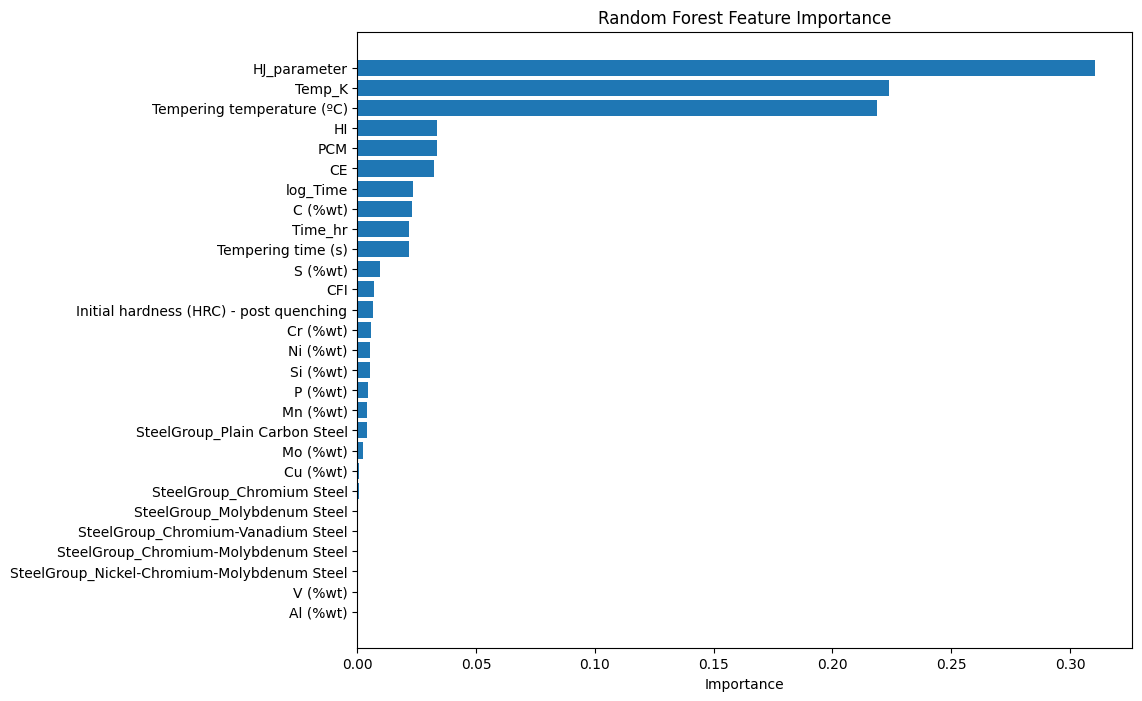

In [111]:
# Feature Importance In Random Forest

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 8))
plt.barh(feature_names[indices], importances[indices])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.show()

#We will be cross verifying with XGBoost.

In [110]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=800,        # number of trees
    learning_rate=0.03,      # slow learning for accuracy
    max_depth=6,             # controls model complexity
    subsample=0.9,           # prevents overfitting
    colsample_bytree=0.8,    # prevents overfitting
    reg_lambda=1.0,          # L2 regularization
    reg_alpha=0.0,           # L1 (can set >0 if noise)
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost RMSE:", rmse)
print("XGBoost R²:", r2)

XGBoost RMSE: 1.500646095990257
XGBoost R²: 0.9884086138475329


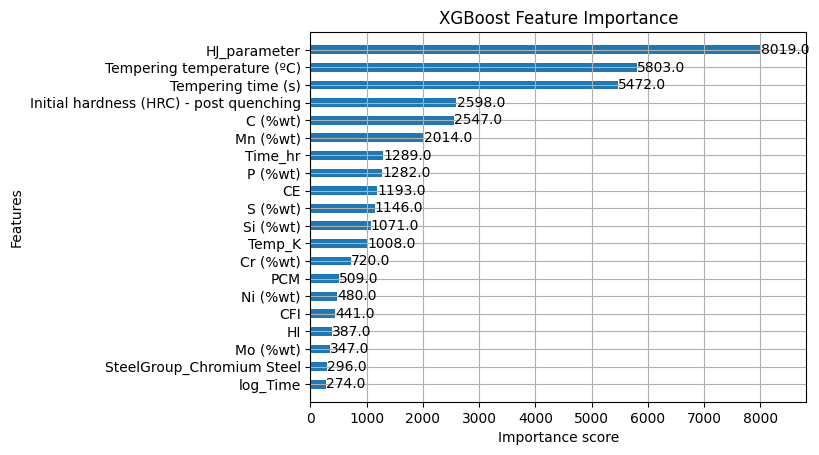

In [112]:
# Feature Importance in XGBoost
xgb.plot_importance(xgb_model, height=0.5, max_num_features=20)
plt.title("XGBoost Feature Importance")
plt.show()